<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [3]:
print(yelp.shape)
yelp.head(2)

(10000, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [4]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [11]:
def tokenize(yelp_text):
    tokens = []

    for doc in tokenizer.pipe(yelp_text, batch_size=500):
        doc_tokens = [token.text for token in doc]
        tokens.append(doc_tokens)
    
    return tokens

In [114]:
def tokenize(doc):
    return [token.lemma_ for token in nlp(doc)]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
#dtm = tfidf.fit_transform(tokenize(yelp['text']))
dtm = tfidf.fit_transform(yelp['text'])
# Print word counts
#dtm

# Get feature names to use as dataframe column headers

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
docs.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
fake_review = ['food was delicious, waiter service attentive and polite']

In [16]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [17]:
new = tfidf.transform(fake_review)

nn.kneighbors(new.todense())

(array([[0.98738336, 1.19681688, 1.20401036, 1.22393604, 1.22488883,
         1.22587573, 1.23054025, 1.23113122, 1.23488071, 1.24113948]]),
 array([[2441,  387, 8915,  954, 1327, 4176, 9375, 5510, 2343, 8558]],
       dtype=int64))

In [20]:
yelp['text'][[2441,  387, 8915,  954, 1327, 4176, 9375, 5510, 2343, 8558]]

2441    Food is cheap and delicious, great quality. I ...
387     Had an excellent experience at this location. ...
8915    Great place, friendly and funny cooks. Everyon...
954     Great service very attentive, food was good bu...
1327    The price is great. The food is average but ev...
4176    So delicious! Will be back with my kids and hu...
9375    Bad greasy food and rude staff yelling at peop...
5510    For a small family joint they sure are attenti...
2343    Perfect lunch! Jennifer was our server and she...
8558    I've been with Active for several visits now a...
Name: text, dtype: object

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDClassifier
import seaborn as sns

In [24]:
sgdc = SGDClassifier()

svd = TruncatedSVD(n_components=500, algorithm='randomized', n_iter=10, random_state=42)

lsa = Pipeline([('tfidf', tfidf),('svd', svd)])

pipe = Pipeline([('lsa', lsa), ('clf', sgdc)])

pipe.fit(yelp['text'], yelp['stars'])

Pipeline(memory=None,
         steps=[('lsa',
                 Pipeline(memory=None,
                          steps=[('tfidf',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                                  max_features=None, min_df=1,
                                                  ngram_range=(1, 1), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words='english',
                                                  strip_

In [25]:
pipe.predict(fake_review)

array([5], dtype=int64)

In [27]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {
    'lsa__tfidf__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}

In [32]:
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)

In [33]:
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [45]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
import matplotlib.pyplot as plt

In [125]:
id2word = corpora.Dictionary(tokenize(review) for review in yelp.text)

In [128]:
token_review = [tokenize(review) for review in yelp.text]

KeyboardInterrupt: 

In [ ]:
# A Dictionary Representation of all the words in our corpus
#id2word = corpora.Dictionary(tokenize(yelp.text))

In [126]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.85)

In [127]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in tokenize(yelp.text)]

TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [53]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 3,
                   passes=10,
                   workers=8
                  )

In [104]:
lda.print_topics()

[(0,
  '0.031*"was" + 0.027*"a" + 0.023*"I" + 0.022*"to" + 0.021*" " + 0.016*"of" + 0.014*"The" + 0.012*"it" + 0.012*"for" + 0.011*"we"'),
 (1,
  '0.033*"to" + 0.032*"I" + 0.026*"a" + 0.018*"is" + 0.013*"for" + 0.013*"was" + 0.013*"of" + 0.012*"my" + 0.012*"in" + 0.011*"you"'),
 (2,
  '0.035*"a" + 0.034*"I" + 0.025*"to" + 0.024*"of" + 0.020*" " + 0.018*"in" + 0.013*"\n\n" + 0.013*"is" + 0.012*"for" + 0.012*"with"')]

In [62]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [113]:
words

[['was', 'a', 'I', 'to', ' ', 'of', 'The', 'it', 'for', 'we'],
 ['to', 'I', 'a', 'is', 'for', 'was', 'of', 'my', 'in', 'you'],
 ['a', 'I', 'to', 'of', ' ', 'in', '\n\n', 'is', 'for', 'with']]

In [106]:
#topics = [' '.join(t[2:5]) for t in words]
topics = [' '.join(t[0:5]).strip().replace('\n', '') for t in words]

In [107]:
topics

['was a I to', 'to I a is for', 'a I to of']

In [108]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [109]:
df = pd.DataFrame.from_records(new_distro, index=yelp.index)
df = df.iloc[:,0:3]
df.columns = topics
df['stars'] = yelp['stars']

In [110]:
df.head()

,was a I to,to I a is for,a I to of,stars
0,0.000000,0.970765,0.024173,1
1,0.517513,0.254337,0.228150,4
2,0.000000,0.651997,0.345511,3
3,0.038275,0.953839,0.000000,1
4,0.848654,0.000000,0.146286,4


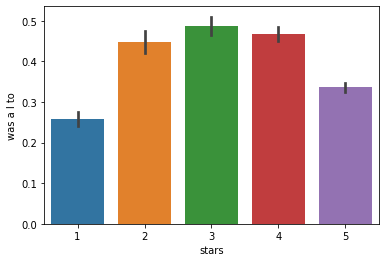

In [132]:
sns.barplot(x="stars", y=topics[0], data=df);

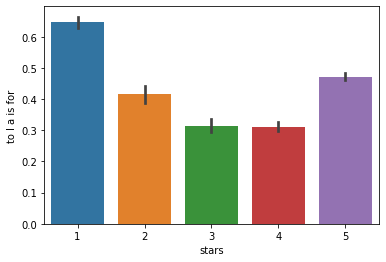

In [133]:
sns.barplot(x="stars", y=topics[1], data=df);

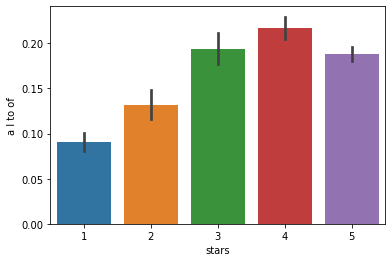

In [134]:
sns.barplot(x="stars", y=topics[2], data=df);

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)